# Import 

In [1]:
import pandas as pd
import seaborn as sns
import boto3
import os
import matplotlib.pyplot as plt

# Load Data

In [2]:
try :
    from config import AWS_ACCESS_KEY_ID, AWS_SECRET_ACCESS_KEY
except:
    AWS_ACCESS_KEY_ID = os.environ.get("AWS_ACCESS_KEY_ID")
    AWS_SECRET_ACCESS_KEY = os.environ.get("AWS_SECRET_ACCESS_KEY")

In [3]:

s3_bucket = "datarunning"
s3_key_id = "strava_id.csv"
s3_key_activities = "strava.csv"
s3_key_lap = "strava_laps.csv"

s3 = boto3.client(
    "s3",
    aws_access_key_id=AWS_ACCESS_KEY_ID,
    aws_secret_access_key=AWS_SECRET_ACCESS_KEY,
)



In [4]:
response = s3.get_object(Bucket=s3_bucket, Key=s3_key_activities)
df_act = pd.read_csv(response['Body'])
    
response = s3.get_object(Bucket=s3_bucket, Key=s3_key_lap)
df_lap = pd.read_csv(response['Body'])

# Feature engineering

In [5]:
df_act

,id,athlete,name,type,start_date_local,Unnamed: 5,distance,moving_time,total_elevation_gain,sport_type,...,pr_count,total_photo_count,suffer_score,numero_semaine_prepa,numero_seance_semaine,type_seance,prepa_name,average_pace,moving_time_minute,moving_time_hour
0,10692823418,98364076,S9/18 - 5/5 - Prépa MDP - Sortie longue,Run,2024-02-04T09:29:49Z,2024-02-04,18071.2,6094,62.0,Run,...,6,0,204.0,S9/18,5/5,Sortie longue,Prépa MDP,5.623243,101.566667,1.692778
1,10682415648,98364076,S9/18 - 4/5 - Prépa MDP - Footing EF,Run,2024-02-02T18:54:45Z,2024-02-02,7285.6,2700,25.0,Run,...,0,0,46.0,S9/18,4/5,Footing EF,Prépa MDP,6.179197,45.000000,0.750000
2,10672381562,98364076,S9/18 - 3/5 - Prépa MDP - Seuil60,Run,2024-02-01T07:17:30Z,2024-02-01,11240.6,3750,52.0,Run,...,3,0,93.0,S9/18,3/5,Seuil60,Prépa MDP,5.560704,62.500000,1.041667
3,10660161665,98364076,S9/18 - 2/5 - Prépa MDP - VMA,Run,2024-01-30T06:30:13Z,2024-01-30,7597.5,2704,40.0,Run,...,0,0,46.0,S9/18,2/5,VMA,Prépa MDP,5.928854,45.066667,0.751111
4,10651550873,98364076,S9 - 1/5 - Prépa MDP - Footing EF,Run,2024-01-29T06:40:30Z,2024-01-29,6279.4,2400,51.0,Run,...,0,0,21.0,S9/18,1/5,Footing EF,Prépa MDP,6.369427,40.000000,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,6609742811,98364076,Morning Walk,Walk,2021-11-03T08:33:08Z,2021-11-03,1064.0,765,21.0,Walk,...,0,0,NaN,NaN,NaN,Morning Walk,NaN,11.976048,12.750000,0.212500
479,10705542506,98364076,S10/18 - 1/5 - Prépa MDP - Footing EF,Run,2024-02-06T06:37:18Z,2024-02-06,6254.8,2400,55.0,Run,...,0,0,17.0,S10/18,1/5,Footing EF,Prépa MDP,6.396588,40.000000,0.666667
480,10712557398,98364076,S10/18 - 2/5 - Prépa MDP - Variation d'allures...,Run,2024-02-07T06:30:04Z,2024-02-07,8468.1,2970,44.0,Run,...,0,0,47.0,S10/18,2/5,"Variation d'allures (VMA, Seuil60)",Prépa MDP,5.847953,49.500000,0.825000
481,10725692821,98364076,S10/18 - 3/5 - Prépa MDP - Footing EF + 6LD,Run,2024-02-09T07:32:02Z,NaN,7179.9,2613,48.0,Run,...,0,0,33.0,S10/18,3/5,Footing EF + 6LD,Prépa MDP,6.066734,43.550000,0.725833


In [7]:
df_act = df_act.dropna(subset=["numero_semaine_prepa", 'numero_seance_semaine'])
df_act.sort_values(by='start_date_local', ascending=False, inplace=True)
df_act

,id,athlete,name,type,start_date_local,Unnamed: 5,distance,moving_time,total_elevation_gain,sport_type,...,pr_count,total_photo_count,suffer_score,numero_semaine_prepa,numero_seance_semaine,type_seance,prepa_name,average_pace,moving_time_minute,moving_time_hour
482,10732650255,98364076,S10/18 - 4/5 - Prépa MDP - Sortie longue,Run,2024-02-10T11:04:29Z,NaN,9998.3,3668,57.0,Run,...,0,0,76.0,S10/18,4/5,Sortie longue,Prépa MDP,6.116208,61.133333,1.018889
481,10725692821,98364076,S10/18 - 3/5 - Prépa MDP - Footing EF + 6LD,Run,2024-02-09T07:32:02Z,NaN,7179.9,2613,48.0,Run,...,0,0,33.0,S10/18,3/5,Footing EF + 6LD,Prépa MDP,6.066734,43.550000,0.725833
480,10712557398,98364076,S10/18 - 2/5 - Prépa MDP - Variation d'allures...,Run,2024-02-07T06:30:04Z,2024-02-07,8468.1,2970,44.0,Run,...,0,0,47.0,S10/18,2/5,"Variation d'allures (VMA, Seuil60)",Prépa MDP,5.847953,49.500000,0.825000
479,10705542506,98364076,S10/18 - 1/5 - Prépa MDP - Footing EF,Run,2024-02-06T06:37:18Z,2024-02-06,6254.8,2400,55.0,Run,...,0,0,17.0,S10/18,1/5,Footing EF,Prépa MDP,6.396588,40.000000,0.666667
0,10692823418,98364076,S9/18 - 5/5 - Prépa MDP - Sortie longue,Run,2024-02-04T09:29:49Z,2024-02-04,18071.2,6094,62.0,Run,...,6,0,204.0,S9/18,5/5,Sortie longue,Prépa MDP,5.623243,101.566667,1.692778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,8080617305,98364076,Footing EF,Run,2022-11-07T06:05:39Z,2022-11-07,6521.6,2711,36.0,Run,...,0,0,15.0,S2/18,1/4,Footing EF,Prépa Semi Paris,6.928406,45.183333,0.753056
249,8070789361,98364076,Footing EF,Run,2022-11-05T10:02:33Z,2022-11-05,13177.8,4916,39.7,Run,...,1,0,113.0,S1/18,4/4,Footing EF,Prépa Semi Paris,6.217617,81.933333,1.365556
250,8065766198,98364076,Footing EF,Run,2022-11-04T07:31:52Z,2022-11-04,6932.2,2705,19.4,Run,...,0,0,17.0,S1/18,3/4,Footing EF,Prépa Semi Paris,6.500542,45.083333,0.751389
251,8055991853,98364076,12 * (30/30) VMA,Run,2022-11-02T06:31:55Z,2022-11-02,7174.8,2571,18.6,Run,...,0,0,47.0,S1/18,2/4,12 * (30/30) VMA,Prépa Semi Paris,5.970149,42.850000,0.714167


In [8]:
# df_act[['Numéro de semaine', 'Durée de prépa']] = df_act['numero_semaine_prepa'].str.split('/', expand=True)
extracted_data = df_act['numero_semaine_prepa'].str.extract(r'S(\d+)/(\d+)')
df_act['Numéro de semaine'] = extracted_data[0].astype(int)  
df_act['Durée de prépa'] = extracted_data[1].astype(int) if len(extracted_data.columns) > 1 else 0  


In [9]:
extracted_data = df_act['numero_seance_semaine'].str.extract(r'(\d+)/(\d+)')
df_act['Numéro de seance'] = extracted_data[0].astype(int)  
df_act['Seance/semaine'] = extracted_data[1].astype(int) if len(extracted_data.columns) > 1 else 0  


In [10]:
df_act.prepa_name.unique()

array(['Prépa MDP', 'Prepa MDP', 'COURSE : Semi - Boulogne',
       'Prépa SEMI BOULOGNE', 'COURSE : 10Km - PSG', 'Prépa 10Km PSG',
       'COURSE : Semi - Paris', 'Prépa Semi Paris'], dtype=object)

In [11]:
def associer_valeur(x):
    if x in ["Prépa MDP"]:
        return 4
    elif x in ["Prépa SEMI BOULOGNE", "COURSE : Semi - Boulogne"]:
        return 3
    elif x in ["Prépa 10Km PSG", "COURSE : 10Km - PSG"]:
        return 2
    elif x in ["Prépa Semi Paris", "COURSE : Semi - Paris"]:
        return 1
    
df_act["prepa_id"] = df_act["prepa_name"].apply(
    lambda x : associer_valeur(x)
    
) 

In [13]:
df_act["distance"] =  df_act["distance"]/1000

In [16]:
df_act.sort_values(by=["prepa_id", "Numéro de semaine", "Numéro de seance"],
                   ascending= [False, False, True],
                   inplace=True)

In [21]:
df_act['Cumul_weekly_volume'] = df_act.groupby(['prepa_id','Numéro de semaine'])['distance'].cumsum()
#df_act['total_weekly_volume'] = df_act.groupby(['prepa_id','Numéro de semaine'])['distance'].sum()


In [24]:
weekly_volume = df_act.groupby(['prepa_id', 'Numéro de semaine'])['distance'].sum().reset_index()
# Fusionner les données calculées avec le DataFrame d'origine
df_act = pd.merge(df_act, weekly_volume, on=['prepa_id', 'Numéro de semaine'], suffixes=('', '_weekly'), how='left')

# Renommer la colonne ajoutée
df_act.rename(columns={'distance_weekly': 'total_weekly_volume'}, inplace=True)
df_act

,id,athlete,name,type,start_date_local,Unnamed: 5,distance,moving_time,total_elevation_gain,sport_type,...,average_pace,moving_time_minute,moving_time_hour,Numéro de semaine,Durée de prépa,Numéro de seance,Seance/semaine,prepa_id,Cumul_weekly_volume,total_weekly_volume
0,10705542506,98364076,S10/18 - 1/5 - Prépa MDP - Footing EF,Run,2024-02-06T06:37:18Z,2024-02-06,6.2548,2400,55.0,Run,...,6.396588,40.000000,0.666667,10,18,1,5,4.0,6.2548,31.9011
1,10712557398,98364076,S10/18 - 2/5 - Prépa MDP - Variation d'allures...,Run,2024-02-07T06:30:04Z,2024-02-07,8.4681,2970,44.0,Run,...,5.847953,49.500000,0.825000,10,18,2,5,4.0,14.7229,31.9011
2,10725692821,98364076,S10/18 - 3/5 - Prépa MDP - Footing EF + 6LD,Run,2024-02-09T07:32:02Z,NaN,7.1799,2613,48.0,Run,...,6.066734,43.550000,0.725833,10,18,3,5,4.0,21.9028,31.9011
3,10732650255,98364076,S10/18 - 4/5 - Prépa MDP - Sortie longue,Run,2024-02-10T11:04:29Z,NaN,9.9983,3668,57.0,Run,...,6.116208,61.133333,1.018889,10,18,4,5,4.0,31.9011,31.9011
4,10651550873,98364076,S9 - 1/5 - Prépa MDP - Footing EF,Run,2024-01-29T06:40:30Z,2024-01-29,6.2794,2400,51.0,Run,...,6.369427,40.000000,0.666667,9,18,1,5,4.0,6.2794,50.4743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,10502925949,98364076,S5 - 3/4 - Prepa MDP - Footing EF,Run,2024-01-06T08:48:57Z,2024-01-06,7.3240,2703,46.0,Run,...,6.147541,45.050000,0.750833,5,18,3,4,NaN,NaN,NaN
250,10413277385,98364076,S3 - 3/4 - Prepa MDP - Endurance de force,Run,2023-12-21T07:13:23Z,2023-12-21,8.9999,3291,87.0,Run,...,6.091371,54.850000,0.914167,3,18,3,4,NaN,NaN,NaN
251,10325426361,98364076,S1 - 1/4 - Introduction d'intensité (Seuil30),Run,2023-12-04T06:34:42Z,2023-12-04,7.9020,2794,47.0,Run,...,5.893910,46.566667,0.776111,1,18,1,4,NaN,NaN,NaN
252,10335947213,98364076,S1 - 2/4 - Prepa MDP - introduction d'intensit...,Run,2023-12-06T06:33:26Z,2023-12-06,9.1301,3241,46.0,Run,...,5.917160,54.016667,0.900278,1,18,2,4,NaN,NaN,NaN


In [ ]:
df_act

In [25]:
from io import StringIO
csv_buffer = StringIO()
df_act.to_csv(csv_buffer, index=False)
s3.put_object(Body=csv_buffer.getvalue(), Bucket=s3_bucket, Key=s3_key_activities)

{'ResponseMetadata': {'RequestId': '91GCHPG303C3T5CP',
  'HostId': 'a0xR7HLsQeK1kGHW5bk+Ts0QFDY04hzBAP0GTSShvbx5K0td2akbxQS79rrvJ1rucinxEkzYsOzv79QNIgaTQCamfGj9J1oY',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'a0xR7HLsQeK1kGHW5bk+Ts0QFDY04hzBAP0GTSShvbx5K0td2akbxQS79rrvJ1rucinxEkzYsOzv79QNIgaTQCamfGj9J1oY',
   'x-amz-request-id': '91GCHPG303C3T5CP',
   'date': 'Sat, 10 Feb 2024 21:56:48 GMT',
   'x-amz-server-side-encryption': 'AES256',
   'etag': '"66a1f21e66da56a17a1ba1687c89fd63"',
   'server': 'AmazonS3',
   'content-length': '0'},
  'RetryAttempts': 0},
 'ETag': '"66a1f21e66da56a17a1ba1687c89fd63"',
 'ServerSideEncryption': 'AES256'}

In [25]:
df_act.prepa_name.unique()

array(['Prépa MDP', 'COURSE : Semi - Boulogne', 'Prépa SEMI BOULOGNE',
       'COURSE : 10Km - PSG', 'Prépa 10Km PSG', 'COURSE : Semi - Paris',
       'Prépa Semi Paris'], dtype=object)

# Analysis

<Axes: xlabel='distance', ylabel='moving_time'>

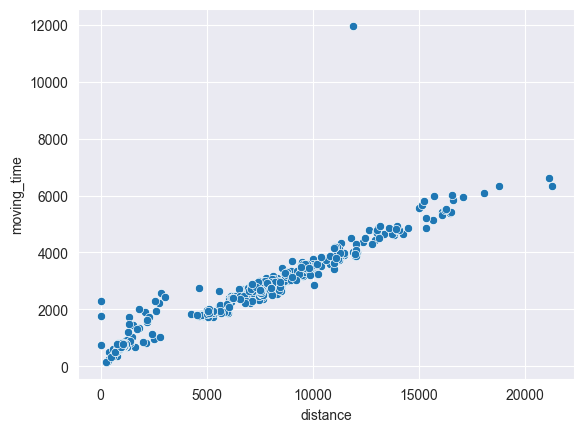

In [8]:
sns.scatterplot(
    data=df_act,
    x='distance',
    y='moving_time'
)

/Users/theocostes/Documents/repos/SynchronizeRunningData/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128522 (\N{SMILING FACE WITH SMILING EYES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/theocostes/Documents/repos/SynchronizeRunningData/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9728 (\N{BLACK SUN WITH RAYS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/theocostes/Documents/repos/SynchronizeRunningData/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/theocostes/Documents/repos/SynchronizeRunningData/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129313 (\N{CLOWN FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/theocostes/Documents

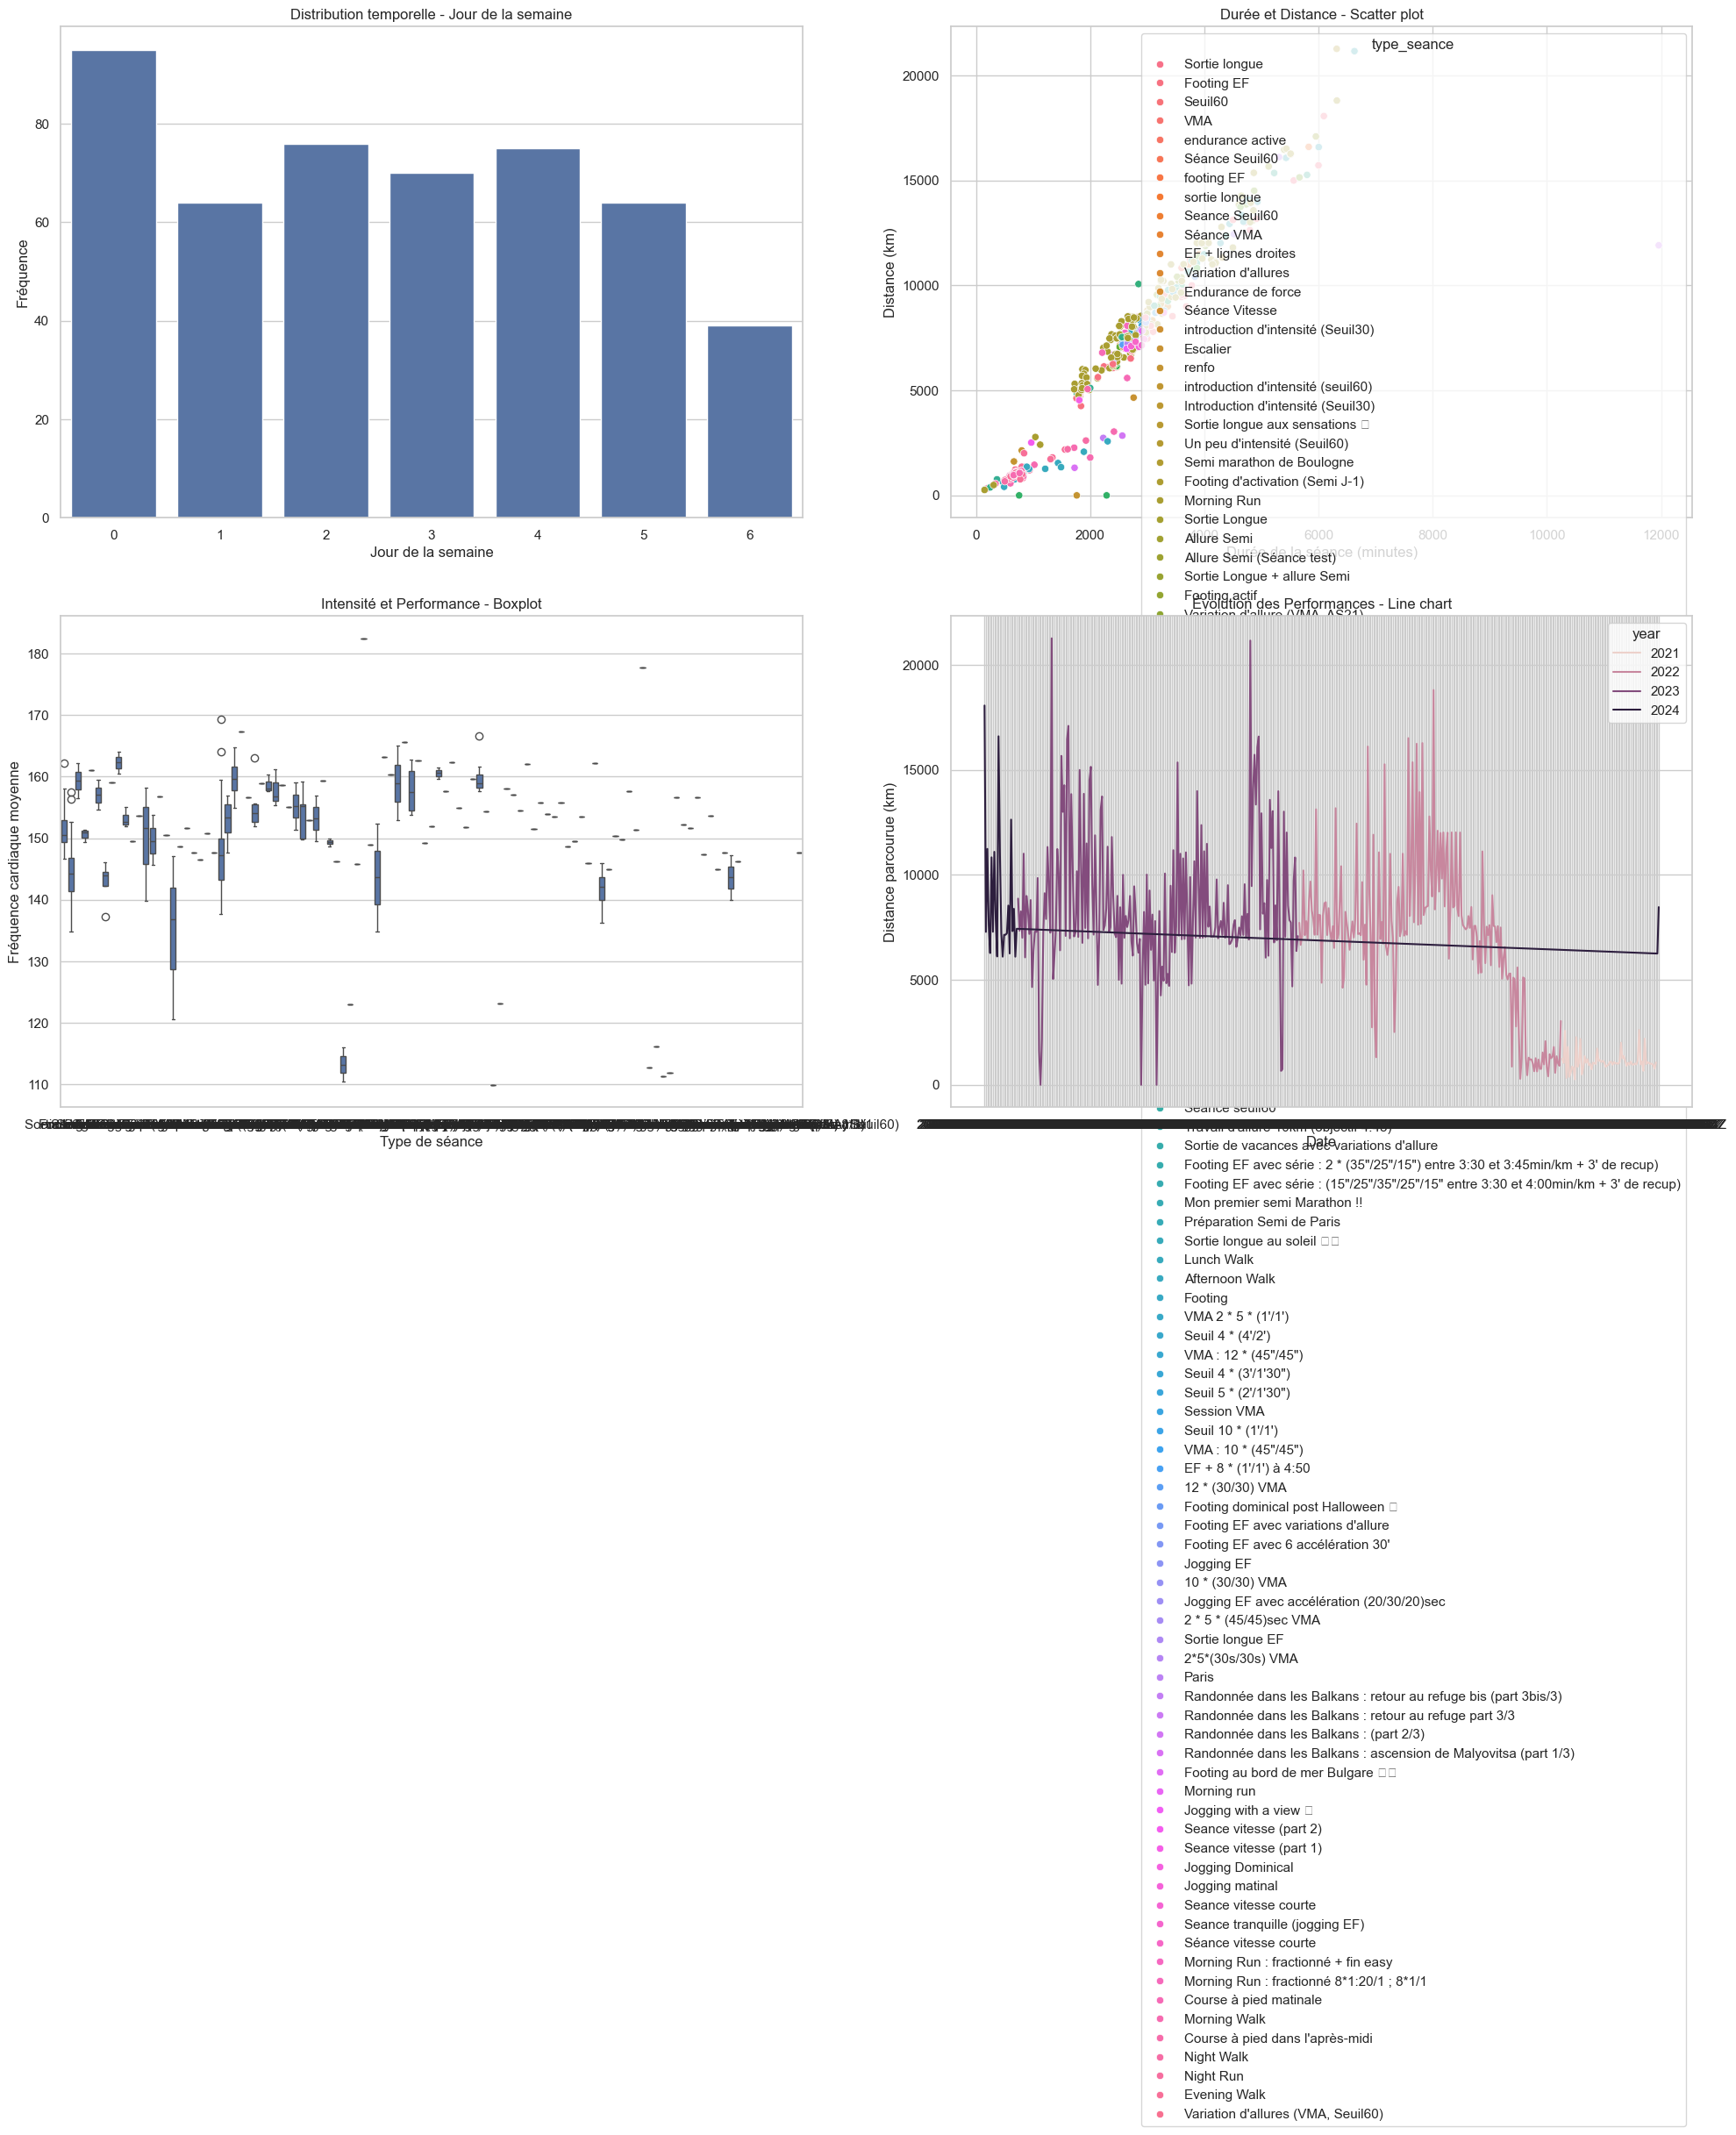

In [9]:
# Configuration pour améliorer l'apparence des graphes
sns.set(style="whitegrid")
plt.figure(figsize=(24, 16))

# Distribution temporelle - Histogramme de la fréquence des séances par jour de la semaine
plt.subplot(2, 2, 1)
sns.countplot(x=pd.to_datetime(df_act['start_date_local']).dt.dayofweek)
plt.xlabel('Jour de la semaine')
plt.ylabel('Fréquence')
plt.title('Distribution temporelle - Jour de la semaine')

# Durée et Distance - Scatter plot de distance par moving_time
plt.subplot(2, 2, 2)
sns.scatterplot(x='moving_time', y='distance', data=df_act, hue='type_seance')
plt.xlabel('Durée de la séance (minutes)')
plt.ylabel('Distance (km)')
plt.title('Durée et Distance - Scatter plot')

# Intensité et Performance - Boxplot de average_heartrate en fonction du type de séance
plt.subplot(2, 2, 3)
sns.boxplot(x='type_seance', y='average_heartrate', data=df_act)
plt.xlabel('Type de séance')
plt.ylabel('Fréquence cardiaque moyenne')
plt.title('Intensité et Performance - Boxplot')

# Évolution des Performances - Line chart de l'évolution de la distance parcourue au fil du temps
plt.subplot(2, 2, 4)
df_act['year'] = pd.to_datetime(df_act['start_date_local']).dt.year
sns.lineplot(x='start_date_local', y='distance', hue='year', data=df_act)
plt.xlabel('Date')
plt.ylabel('Distance parcourue (km)')
plt.title('Évolution des Performances - Line chart')


# Afficher les graphiques
plt.show()

[]

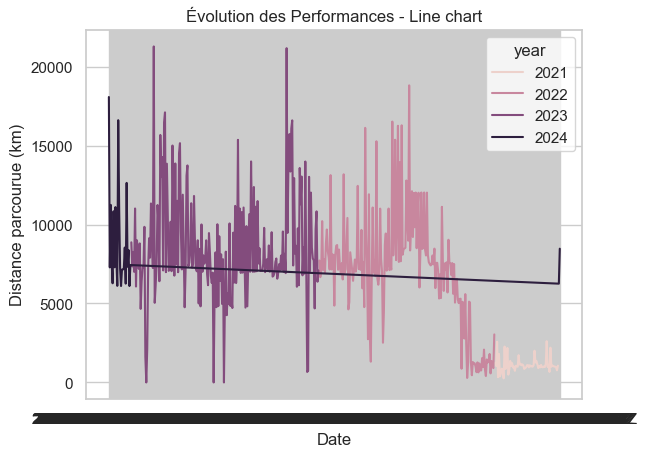

In [10]:
df_act['year'] = pd.to_datetime(df_act['start_date_local']).dt.year
sns.lineplot(x='start_date_local', y='distance', hue='year', data=df_act)
plt.xlabel('Date')
plt.ylabel('Distance parcourue (km)')
plt.title('Évolution des Performances - Line chart')

plt.plot()

In [11]:
max(df_act.start_date_local)

'2024-02-07T06:30:04Z'